# Tarea 2 Máquinas de aprendizaje
<i>Felipe Olavarria, Rol:201673606-9</i>

<i>Jean Aravena, Rol:201673573-9</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

## 1. Sentiment Analysis en Texto

In [2]:
#train df
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
labels_train = df_train.Sentiment.values

#test df
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_test_text = df_test.Text
labels_test = df_test.Sentiment.values

>a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

Data frame: train_data.csv

         Sentiment
count  3554.000000
mean      0.498030
std       0.500066
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

Index(['Sentiment', 'Text'], dtype='object')

Shape: (3554, 2)

Podemos observar que la data posee 3554 datos y que se distribuye entre dos columnas: 'Sentiment' que tiene 2 clases, +1 si el comentario es calificado como positivo y 0 como negativo, y 'Text' que corresponde al texto expuesto en el comentario.

Distribución de clases:
	 Clase Negativa, cantidad: 1784, porcentaje: 50.2%
	 Clase Positiva, cantidad: 1770, porcentaje: 49.8%


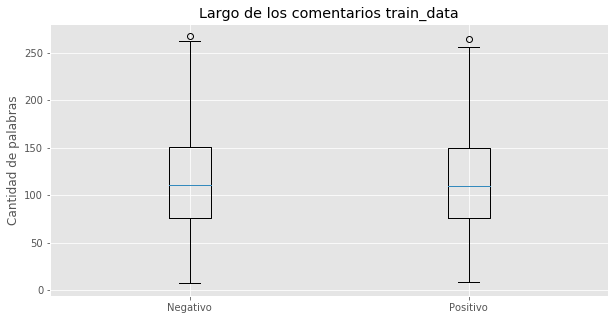

In [3]:
#train df
print("Data frame: train_data.csv\n")
print(df_train.describe())
print()
print(df_train.keys())
print("\nShape: " + str(df_train.shape))
print("\nPodemos observar que la data posee 3554 datos y que se distribuye entre dos columnas: 'Sentiment' que tiene 2 clases,"
      " +1 si el comentario es calificado como positivo y 0 como negativo, y 'Text' que corresponde al texto expuesto" 
      " en el comentario.\n")

a = df_train[df_train['Sentiment'] == 0]['Text'].shape[0]
b = df_train[df_train['Sentiment'] == 1]['Text'].shape[0]
c = df_train.shape[0]
print('Distribución de clases:')
print('\t Clase Negativa, cantidad: ' +str(a)+ ', porcentaje: ' + str(round(a/c*100,2)) + '%')
print('\t Clase Positiva, cantidad: ' +str(b)+ ', porcentaje: ' + str(round(b/c*100,2)) + '%')


#general
data_train = [df_train[df_train['Sentiment'] == 0].Text.str.len(),df_train[df_train['Sentiment'] == 1].Text.str.len()]

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.boxplot(data_train, labels = ["Negativo", "Positivo"])
plt.title('Largo de los comentarios train_data')
plt.ylabel('Cantidad de palabras')
plt.show()


***La data se presenta de manera uniforme en general y en cada clase la estructura sigue siendo similar. En primeros principios se puede observar que el largo de los comentarios no influye en la calificacion.***

Data frame: test_data.csv

         Sentiment
count  3554.000000
mean      0.492684
std       0.500017
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

Index(['Sentiment', 'Text'], dtype='object')

Shape: (3554, 2)

Podemos observar que la data posee 3554 datos y que se distribuye entre dos columnas: 'Sentiment' que tiene 2 clases, +1 si el comentario es calificado como positivo y 0 como negativo, y 'Text' que corresponde al texto expuesto en el comentario.

Distribución de clases:
	 Clase Negativa, Cantidad: 1803, porcentaje: 50.73%
	 Clase Positiva, Cantidad: 1751, porcentaje: 49.27%


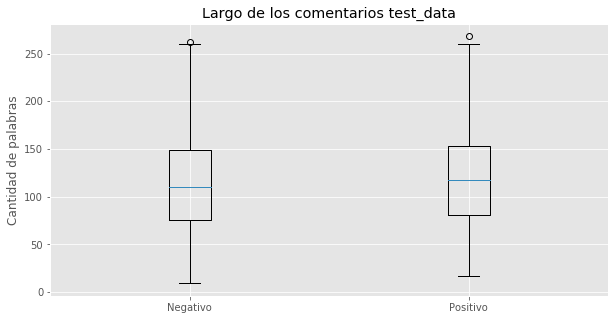

In [4]:
#test df

print("Data frame: test_data.csv\n")
print(df_test.describe())
print()
print(df_test.keys())
print("\nShape: " + str(df_test.shape))
print("\nPodemos observar que la data posee 3554 datos y que se distribuye entre dos columnas: 'Sentiment' que tiene 2 clases,"
      " +1 si el comentario es calificado como positivo y 0 como negativo, y 'Text' que corresponde al texto expuesto" 
      " en el comentario.\n")

a = df_test[df_test['Sentiment'] == 0]['Text'].shape[0]
b = df_test[df_test['Sentiment'] == 1]['Text'].shape[0]
c = df_test.shape[0]
print('Distribución de clases:')
print('\t Clase Negativa, Cantidad: ' +str(a)+ ', porcentaje: ' + str(round(a/c*100,2)) + '%')
print('\t Clase Positiva, Cantidad: ' +str(b)+ ', porcentaje: ' + str(round(b/c*100,2)) + '%')


#general
data_test = [df_test[df_test['Sentiment'] == 0].Text.str.len(),df_test[df_test['Sentiment'] == 1].Text.str.len()]

plt.figure(figsize=(10,5))
plt.boxplot(data_test, labels = ["Negativo", "Positivo"])
plt.title('Largo de los comentarios test_data')
plt.ylabel('Cantidad de palabras')
plt.show()

***Nuevamante la data se presenta de manera uniforme en general y en cada clase la estructura sigue siendo similar. En primeros principios se puede observar que el largo de los comentarios no influye en la calificacion.***

Text(0, 0.5, 'Cantidad de palabras')

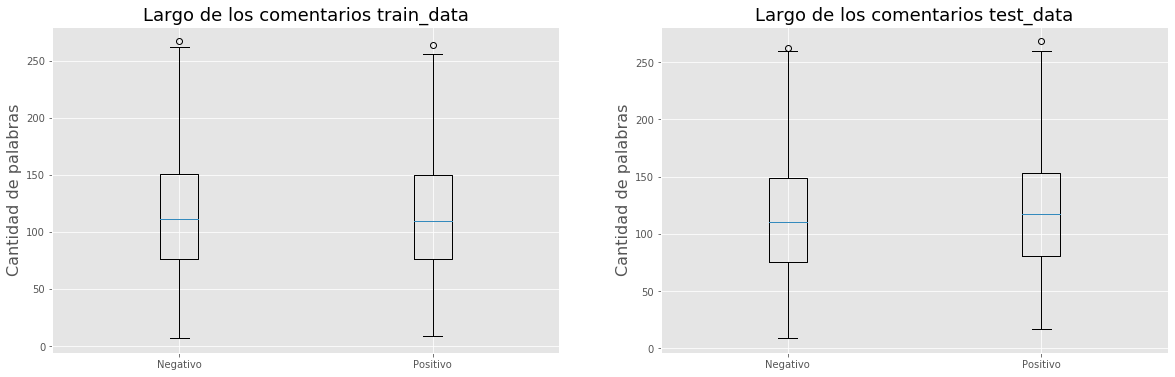

In [5]:
# Comparacion de los boxplot de train y test
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.boxplot(data_train, labels = ["Negativo", "Positivo"])
plt.title('Largo de los comentarios train_data', fontsize=18)
plt.ylabel('Cantidad de palabras', fontsize=16)

plt.subplot(122)
plt.boxplot(data_test, labels = ["Negativo", "Positivo"],)
plt.title('Largo de los comentarios test_data', fontsize=18)
plt.ylabel('Cantidad de palabras', fontsize=16)

***El largo en los comentarios de la data de train y test son bastante similares, se puede apreciar que los textos positivos son marginalmente más largos en el caso de la data de test y en la de train estos se mantienen muy similar a los negativos. Ademas con los datos obtenidos anteriormente de cada data sabemos que existe una leve mayoria en la totalidad de comentarios calificados como negativos.***

>b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [6]:
from sklearn.model_selection import train_test_split

c = df_train.shape[0] # 3554 datos
d = int(c * 0.3) # 1066 datos en df_val_text y 2488 datos en df_train_text

df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size = d, random_state=0)


***El tamaño de entrenamiento correspondera al 70% de los datos.***

>c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (lower-casing), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (stop word removal [3]), además de pasar las palabras a su tronco léxico con la técnica de lemmatizer [4]. Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

In [7]:
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))


texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

 love eat cake
 love eating cake
 loved eating cake
 love eating cake
 n't love eating cake


Las herramientas de procesamiento de lenguaje natural generalmente se centran es el significado semantico del texto, usando tokens para identificar palabras o patrones. Por lo que es muy útil procesar el texto para reducir el número de tokens y aumentar su representatividad en el texto. El uso de mayúsculas aporta poca información <b>semantica</b> (aunque puede tener sentido dentro de un contexto, como el enfasis que algunos escritores puedan darle a ciertas palabras o el nombre de algun lugar sea identico al de algun verbo). En el caso de palabras como "not" y sus usos "don't"->" \'nt" es importante tratarla aparte al comienzo de una oración debido a que invierte el singificado de esta."Stop words" son palabras como "I", "the", “be”, "to", etc. Estas palabras son muy populares en íngles, por lo que se repiten mucho en el texto, sin embargo aportan poco valor semantico a una frase. Al reducir el número de tokens también reduce el peso computacional de trabajar el texto. 

>d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado TF (term-frequency). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

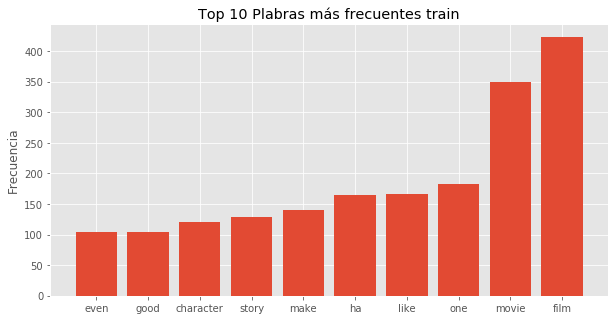

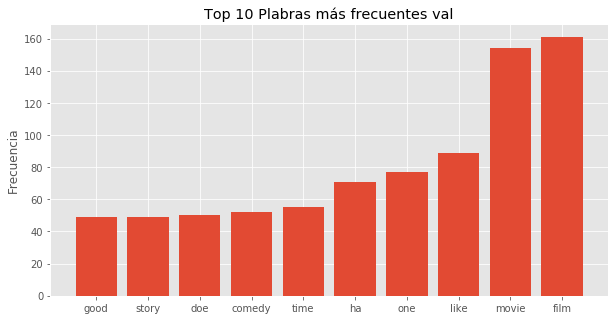

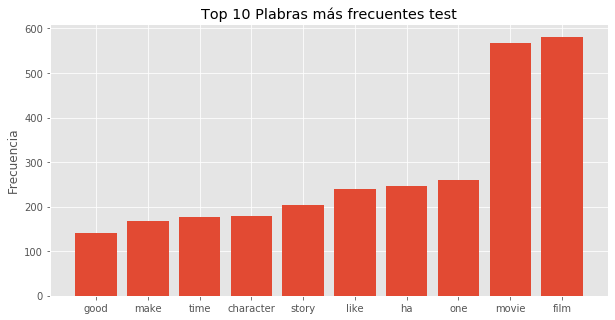

In [8]:
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)

features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)


vocab = vectorizer.get_feature_names()

#train
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

dic = sorted(list(zip(vocab, dist)),key=lambda x: x[1])


plt.figure(figsize=(10,5))
plt.bar(list(zip(*dic[-10:]))[0], list(zip(*dic[-10:]))[1])
plt.ylabel('Frecuencia')
plt.title('Top 10 Plabras más frecuentes train')
plt.show()


#val
dist_val=list(np.array(features_val.sum(axis=0)).reshape(-1,))

dic_val = sorted(list(zip(vocab, dist_val)),key=lambda x: x[1])


plt.figure(figsize=(10,5))
plt.bar(list(zip(*dic_val[-10:]))[0], list(zip(*dic_val[-10:]))[1])
plt.ylabel('Frecuencia')
plt.title('Top 10 Plabras más frecuentes val')
plt.show()


#test
dist_test=list(np.array(features_test.sum(axis=0)).reshape(-1,))

dic_test = sorted(list(zip(vocab, dist_test)),key=lambda x: x[1])


plt.figure(figsize=(10,5))
plt.bar(list(zip(*dic_test[-10:]))[0], list(zip(*dic_test[-10:]))[1])
plt.ylabel('Frecuencia')
plt.title('Top 10 Plabras más frecuentes test')
plt.show()


***Como es de esperarse las palabras más repetidas son descriptibas de lo que se puede críticar de una película. Ninguna de las palabras parece ser de interes para diferenciar el tipo de reseña. Sin embargo, si no se supiese de que se trataban los textos sería un indicador útil. Dentro de los tres sets los gráficos no son iguales, pero no  existe una mayor preferencia o irregularidad en la frecuencia de las palabras.***

>e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica LSA (Latent Semantic Analysis) [5] que a diferencia de PCA, no centra los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

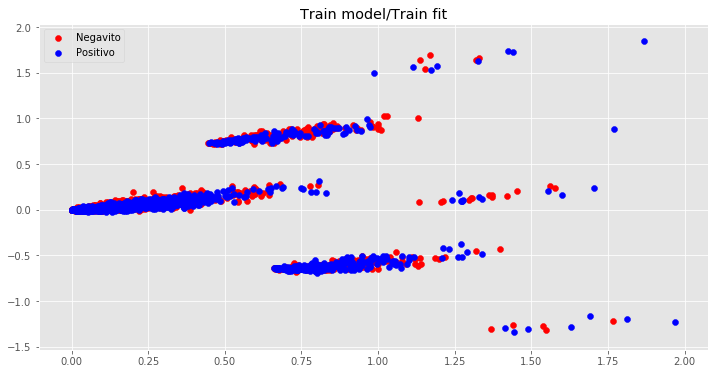

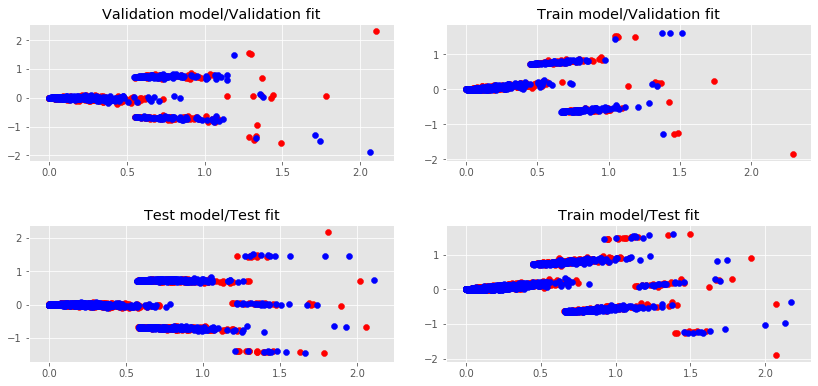

In [9]:
from sklearn.decomposition import TruncatedSVD
#train
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(12,6))

classes = ['Negavito','Positivo']
unique = np.unique(classes)
colors = {0: 'red', 1: 'blue'}
for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_train[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_train[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title("Train model/Train fit")
plt.show()


#validate
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
model = TruncatedSVD(n_components=2)
model.fit(features_val)
x_plot = model.transform(features_val)

for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Validation model/Validation fit")

plt.subplot(2, 2, 2)
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_val)
for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Train model/Validation fit")

#test
plt.subplot(2, 2, 3)
model = TruncatedSVD(n_components=2)
model.fit(features_test)
x_plot = model.transform(features_test)

for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Test model/Test fit")

plt.subplot(2, 2, 4)
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_test)

for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Train model/Test fit")
plt.tight_layout(pad=3.0)


plt.show()

***La cercania entre puntos representa la similitud semántica entre ellos. En la data train se ven tres clusters principales y tres menores a la derecha, de estos no se ve una separación clara de las clases en ellos. Los textos positivos tienen mayores outlayers que representan textos más disintos a la norma. También se muestran distintas combinaciones de modelos y la data utilizada para comparar diferencias. No existe mayor diferencia con el conjunto de validación, en terminos de agrupación existen los mismos tres grupos principales solo que en una escala distinta. Para el conjunto de test tampoco hay una diferencia notable, se alcanzan a diferenciar en ambos graficas seis agrupaciones similares.***

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.

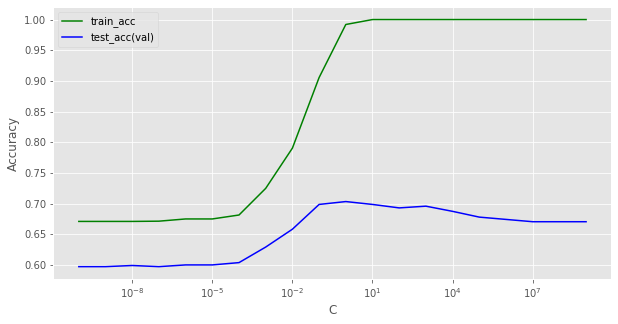

Máximo test_acc: 0.7036, C óptimo: 1.0
	 train_acc: 0.992


In [12]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    #print("Param C= ",param)
    model= LogisticRegression(solver = 'liblinear')
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-10,10,1).astype(float)]

ltrain = list()
ltest  = list()
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = i)
    ltrain.append(train_acc)
    ltest.append(test_acc)

plt.figure(figsize=(10,5))
plt.semilogx(Cs, ltrain, c = 'green', label = 'train_acc')
plt.semilogx(Cs, ltest, c = 'blue', label = 'test_acc(val)')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()
plt.show()

#####
print("Máximo test_acc: "+str(round(max(ltest),4)) + ", C óptimo: "+ str(round(Cs[ltest.index(max(ltest))],4)))
print("\t train_acc: "+str(round(ltrain[ltest.index(max(ltest))],4)))

***El parámetro de regularización controla el impacto o el nivel de contracción que sufren los coeficientes de la solución no regularizada. En ridge regression ($l_2$) conforme aumenta C, la flexibilidad del ajuste disminuye, lo cual disminuye la varianza, pero aumenta el bias. El valor óptimo seleccionado de $C = 1$, corresponde al valor que máximiza el acierto en el conjunto de test. Se puede apreciar que los valores grandes de $C$ dejan de penalizar y se aumenta el overfitting sobre el conjunto de entrenamiento.***

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización 𝐶 para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

C:\Users\FAMILIA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Máximo test_acc kernel=linear: 0.6951, C óptimo: 0.1
	 train_acc kernel=linear: 0.9554

Máximo test_acc kernel=rbf (gaussiano): 0.6998, C óptimo: 1000.0
	 train_acc kernel=rbf (gaussiano): 0.9851


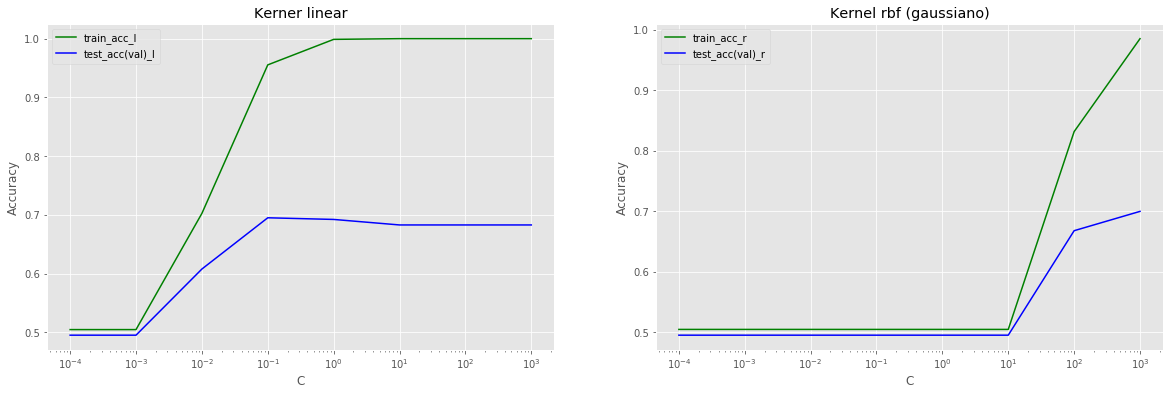

In [23]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel,param2=3):
    #print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel,degree=param2) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4).astype(float)]

ltrain_r = list()
ltest_r = list()
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param = i,kernel="rbf")
    ltrain_r.append(train_acc)
    ltest_r.append(test_acc)
    
ltrain_l = list()
ltest_l = list()
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param = i,kernel="linear")
    ltrain_l.append(train_acc)
    ltest_l.append(test_acc)
    
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.semilogx(Cs, ltrain_l, c = 'green', label = 'train_acc_l')
plt.semilogx(Cs, ltest_l, c = 'blue', label = 'test_acc(val)_l')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.title("Kerner linear")
plt.legend()

plt.subplot(122)
plt.semilogx(Cs, ltrain_r, c = 'green', label = 'train_acc_r')
plt.semilogx(Cs, ltest_r, c = 'blue', label = 'test_acc(val)_r')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.title("Kernel rbf (gaussiano)")
plt.legend()

#####
print("Máximo test_acc kernel=linear: "+str(round(max(ltest_l),4)) + ", C óptimo: "+ str(round(Cs[ltest_l.index(max(ltest_l))],4)))
print("\t train_acc kernel=linear: "+str(round(ltrain_l[ltest_l.index(max(ltest_l))],4)))

print("\nMáximo test_acc kernel=rbf (gaussiano): "+str(round(max(ltest_r),4)) + ", C óptimo: "+ str(round(Cs[ltest_r.index(max(ltest_r))],4)))
print("\t train_acc kernel=rbf (gaussiano): "+str(round(ltrain_r[ltest_r.index(max(ltest_r))],4)))


***El parámetro de regularizacion C establece un compromiso entre el error de entrenamiento y la complejidad del modelo, un valor grande de este no permite muchas violaciones de las restricciones originales, mientras que un valor pequeño de C permite ignorar un gran conjunto de puntos de entrenamiento y por lo tanto enfoca el aprendizaje en la maximización del margen. Si consideramos los extremos un C=infinito implicaria que no se permite ninguna violación del margen, lo que es valido solo si las clases son perfectamente separables, mientras que un C más proximo a cero, penaliza menos los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano.***

***En ambos kernel podemos ver lo descrito anteriormente respecto al parametro C, pero si consideramos un valor fijo, este impacta de manera distinta a ambos kernel dada su formulación, donde hay que destacar que el kernel gaussiano obtiene mejores resultados.***

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

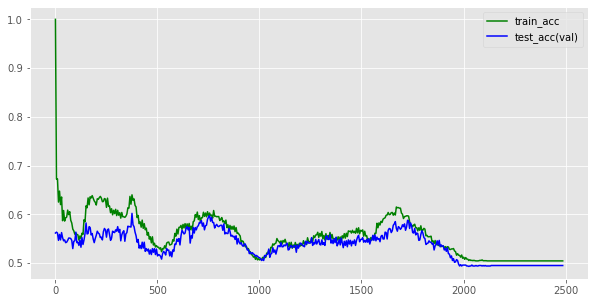

Máximo test_acc: 0.6, K óptimo: 376
	 train_acc: 0.64


In [67]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[0], 5)

ltrain = list()
ltest  = list()
for i in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = i)
    ltrain.append(train_acc)
    ltest.append(test_acc)
    
plt.figure(figsize=(10,5))
plt.plot(Ks, ltrain, c = 'green', label = 'train_acc')
plt.plot(Ks, ltest, c = 'blue', label = 'test_acc(val)')
plt.legend()
plt.show()

print("Máximo test_acc: "+str(round(max(ltest),2)) + ", K óptimo: "+ str(round(Ks[ltest.index(max(ltest))],2)))
print("\t train_acc: "+str(round(ltrain[ltest.index(max(ltest))],2)))

***Para decidir la clase de un punto es muy importante el valor de K, dado que terminará casi por definir a qué grupo pertenecerán los puntos, sobre todo en las fronteras entre grupos. En general, las fronteras se suavizan a medida que usamos un valor más grande. En este sentido, a mayor K, la solución se "regulariza". Pero esto último no implica que al aumentar K la precisión del algoritmo vaya a mejorar, lo cual se puede apreciar directamente en el gráfico.***

***A diferencia de los modelos anteriores este algoritmo no cae en overfitting en ninguna circunstancia debido a su forma de actuar. Recordando la vizualización de vectorial mostrada en el apendice e), se muestra bajo esa representación que existen textos con atributos muy similares, sin embargo con distinta etiqueta. Esto da a entender que la similitud de los textos por si sola no es clave al momento de tomar una decisión.***

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.

In [64]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1]/10, 10) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 10 ) #choose steps


ltrain = np.zeros(shape=(Depths.shape[0],SamplesS.shape[0])) 
ltest  = np.zeros(shape=(Depths.shape[0],SamplesS.shape[0])) 
for i in range(Depths.shape[0]):
    for j in range(SamplesS.shape[0]):
        model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d = Depths[i], param_m=SamplesS[j])
        ltrain[i][j] = train_acc
        ltest[i][j]  = test_acc


#print("Máximo test_acc: "+str(round(max(ltest),2)))

Máximo test_acc: 0.6332, Max depth óptimo: 531.0 Min samples óptimo: 372
	 train_acc: 0.8219


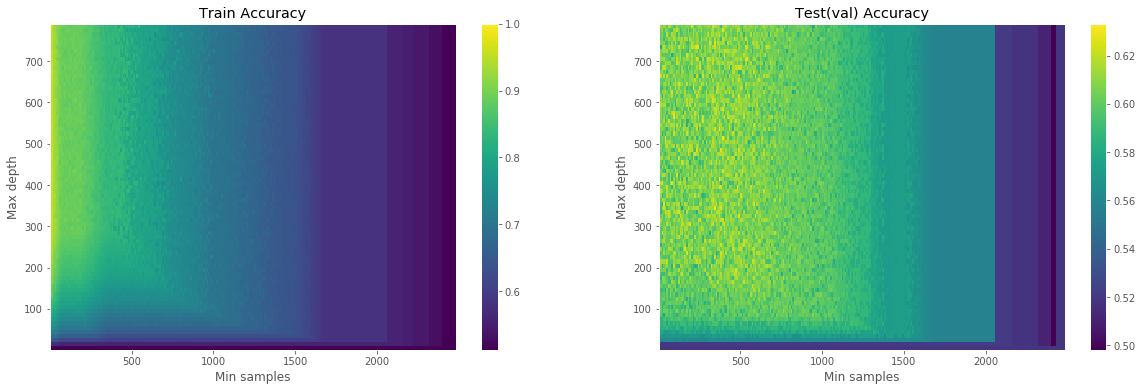

In [66]:
%matplotlib inline
#test = np.asarray(zs_train,).reshape(200,200)
#print(len(xs_train))

plt.figure(figsize=(20,6))

plt.subplot(121)
plt.pcolormesh(SamplesS,Depths,ltrain)#,vmin=0, vmax=1)
plt.title("Train Accuracy")
plt.xlabel("Min samples")
plt.ylabel("Max depth")
plt.colorbar()

plt.subplot(122)
plt.pcolormesh(SamplesS,Depths,ltest)#,vmin=0, vmax=1)
plt.title("Test(val) Accuracy")
plt.xlabel("Min samples")
plt.ylabel("Max depth")
plt.colorbar()

m = -1
k = -1
l = -1

for i in range(Depths.shape[0]):
    for j in range(SamplesS.shape[0]):
        if ltest[i][j] > m:
            m = ltest[i][j]
            k = i
            l = j

print("Máximo test_acc: "+str(round(m,4)) + ", Max depth óptimo: "+ str(round(Depths[k],4)) + " Min samples óptimo: "+ str(round(SamplesS[l],4)))
print("\t train_acc: "+str(round(ltrain[k][l],4)))

***Se puede observar como en ambos graficos el parametro Max depth no influye mucho en la precisión del algoritmo, por el 
contrario Min samples repercute totalmente en su rendimiento, a medida que este va creciendo se puede distinguir una tendencia decreciente respecto al rendimiento del algoritmo. Además, cabe destacar que Max depth consigue mejor precisión entre un valor de 200 y 700 considerando fijo Min samples.***

> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def do_ANN(x,y, xv,yv, param, param2):
    #print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation=param2))
    model.add(Dense(1, activation=param2))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,12)]

ltrain_s = list()
ltest_s  = list()
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val,param = i,param2 = "sigmoid")
    ltrain_s.append(train_acc)
    ltest_s.append(test_acc)

ltrain_t = list()
ltest_t  = list()
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, param = i,param2 = "tanh")
    ltrain_t.append(train_acc)
    ltest_t.append(test_acc)
    
ltrain_r = list()
ltest_r  = list()
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, param = i,param2 = "relu")
    ltrain_r.append(train_acc)
    ltest_r.append(test_acc)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
ltrain_l = list()
ltest_l  = list()
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, param = i,param2 = "linear")
    ltrain_l.append(train_acc)
    ltest_l.append(test_acc)

Máximo test_acc (función sigmoidal): 0.6585, N óptimo: 128
	 train_acc (función sigmoidal): 0.7387

Máximo test_acc (función tanh): 0.7101, N óptimo: 1024
	 train_acc (función tanh): 0.9964

Máximo test_acc (función lineal): 0.5047, N óptimo: 4
	 train_acc (función lineal): 0.4952


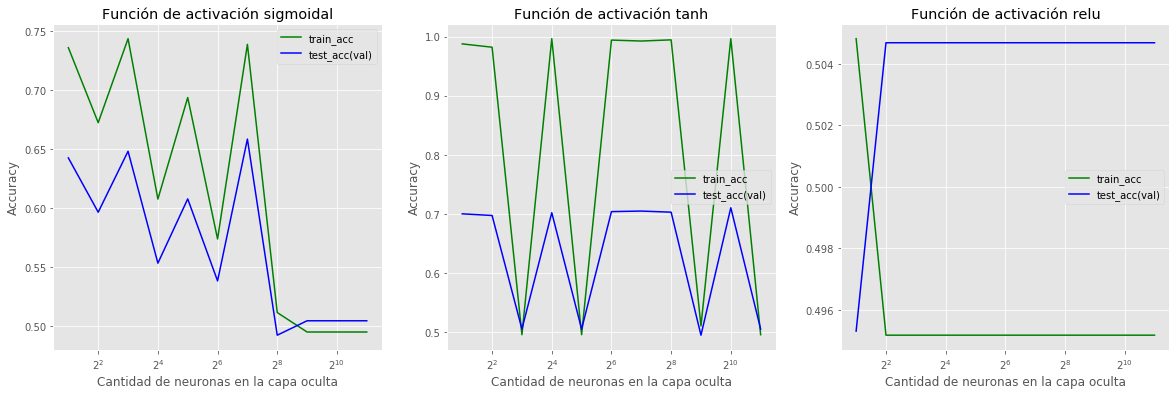

In [11]:
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.semilogx(N_h, ltrain_s, c = 'green', label = 'train_acc', basex=2)
plt.semilogx(N_h, ltest_s, c = 'blue', label = 'test_acc(val)', basex=2)
plt.title("Función de activación sigmoidal")
plt.ylabel("Accuracy")
plt.xlabel("Cantidad de neuronas en la capa oculta")
plt.legend()

plt.subplot(132)
plt.semilogx(N_h, ltrain_t, c = 'green', label = 'train_acc', basex=2)
plt.semilogx(N_h, ltest_t, c = 'blue', label = 'test_acc(val)', basex=2)
plt.title("Función de activación tanh")
plt.ylabel("Accuracy")
plt.xlabel("Cantidad de neuronas en la capa oculta")
plt.legend()

plt.subplot(133)
plt.semilogx(N_h, ltrain_r, c = 'green', label = 'train_acc', basex=2)
plt.semilogx(N_h, ltest_r, c = 'blue', label = 'test_acc(val)', basex=2)
plt.title("Función de activación relu")
plt.ylabel("Accuracy")
plt.xlabel("Cantidad de neuronas en la capa oculta")
plt.legend()

#####
print("Máximo test_acc (función sigmoidal): "+str(round(max(ltest_s),4)) + ", N óptimo: "+ str(round(N_h[ltest_s.index(max(ltest_s))],4)))
print("\t train_acc (función sigmoidal): "+str(round(ltrain_s[ltest_s.index(max(ltest_s))],4)))

print("\nMáximo test_acc (función tanh): "+str(round(max(ltest_t),4)) + ", N óptimo: "+ str(round(N_h[ltest_t.index(max(ltest_t))],4)))
print("\t train_acc (función tanh): "+str(round(ltrain_t[ltest_t.index(max(ltest_t))],4)))

print("\nMáximo test_acc (función lineal): "+str(round(max(ltest_r),4)) + ", N óptimo: "+ str(round(N_h[ltest_r.index(max(ltest_r))],4)))
print("\t train_acc (función lineal): "+str(round(ltrain_r[ltest_r.index(max(ltest_r))],4)))


***Considerando la función de activación sigmoidal podemos ver que contar con más neuronas en la capa oculta no implica una mejora del rendimiento, mientras que tanh parece tener un comportamiento cíclico respecto a la cantidad de neuronas empleadas. Igualmente, tanh obtiene mejores resultados en base a los datos que tenemos, esto puede ser causado por la distribución de estos datos y lo complejo de separar las clases. Por último, la función de activación relu obtiene el peor rendimiento, sin importar la cantidad de neuronas utilizadas relu no logra beneficiar el aprendizaje.***

> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?


### Test_acc de los distintos modelos utilizados:
<li>
<li><i>Regresión Logística: 0.703</i>
<li><i>SVM kernel lineal: 0.695</i>
<li><i>SVM kernel gaussiano: 0.699</i>
<li><i>k-NN: 0.600</i>
<li><i>Arbol de Decisión: 0.633</i>
<li><i>ANN función de activación sigmoidal: 0.658</i>
<li><i>ANN función de activación tanh: 0.710</i>
<li><i>ANN función de activación relu: 0.504</i>

In [13]:
#Regresión Logística Regularizado C = 1
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, param = 1)

print("Train Accuracy Regresión logística: ", str(round(train_acc,3)))
print("Test Accuracy Regresión logística: ", str(round(test_acc,3)))

#ANN función de activación tanh con Nh = 1024
model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, param = 1024,param2 = "tanh")

print("\nTrain Accuracy ANN: ", str(round(train_acc,3)))
print("Test Accuracy ANN: ", str(round(test_acc,3)))

Train Accuracy Regresión logística:  0.992
Test Accuracy Regresión logística:  0.704

Train Accuracy ANN:  0.99
Test Accuracy ANN:  0.699


***Considerando los dos mejores modelos obtenidos, se consigue una mejora del 0.5% respecto a ANN usando regresión logística. Sin embargo, un 70% de precisión debe estar lejos de ser mejor que una persona común. Desconocemos que tan buena es una persona en detectar negatividad o positividad en comentarios sobre películas, pero el valor de este es una buena referencia para considerar un modelo útil o no. Otra opción es compararlo con un valor en el estado del arte del problema.***

> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
print("Accuracy Score: " + str(round(accuracy_score(labels_test, vader_pred_test),2)))

Accuracy Score: 0.64


***No es mejor que lo obtenido por la regresión lineal, luego de todo el procesamiento. Considerar un texto positivo o negativo dado las palabras que usa no es una buena manera para tratar el problema, teniendo en cuenta que un crítico puede  ser sarcastico o no necesariamente usar palabras negativas para mostar su descontento. Aún así esta a la par con el acrieto de los modelos entrenados recientemente.***

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [14]:
V = len(vocab)
word_scores = np.zeros((V, 2))
#logit 
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 10)

for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)


In [15]:
doc = [i[0] for i in word_scores]

dic = sorted(list(zip(vocab, doc)),key=lambda x: x[1])

print("Palabras más 'Negativas':")
for i in range(1,16):
    print("\t"+str(i)+". "+str(list(zip(*dic[-16:]))[0][16-i])+", rate : " + str(round(list(zip(*dic[-16:]))[1][16-i],2)))

print("Palabras más 'Positivas':")
for i in range(1,16):
    print("\t"+str(i)+". "+str(list(zip(*dic[:16]))[0][i])+", rate : " + str(round(1-list(zip(*dic[:16]))[1][i],2)))



Palabras más 'Negativas':
	1. cliche, rate : 0.96
	2. dull, rate : 0.96
	3. worst, rate : 0.96
	4. apparent, rate : 0.95
	5. bad, rate : 0.94
	6. devoid, rate : 0.94
	7. pretentious, rate : 0.94
	8. silly, rate : 0.94
	9. heavy, rate : 0.94
	10. nearly, rate : 0.93
	11. boring, rate : 0.93
	12. plodding, rate : 0.92
	13. feel, rate : 0.92
	14. unfortunately, rate : 0.92
	15. suffers, rate : 0.92
Palabras más 'Positivas':
	1. world, rate : 0.94
	2. witty, rate : 0.93
	3. still, rate : 0.93
	4. fun, rate : 0.92
	5. rare, rate : 0.92
	6. marvel, rate : 0.91
	7. creative, rate : 0.91
	8. haunting, rate : 0.9
	9. storytelling, rate : 0.9
	10. skillful, rate : 0.9
	11. tasty, rate : 0.9
	12. history, rate : 0.89
	13. stitch, rate : 0.89
	14. wonderful, rate : 0.89
	15. heart, rate : 0.89


***Dentro de ambos extremos existen palabras que pueden ser consideradas neutras en cualquier contexto. Por ejemplo silly, feel, world, still o rare. Por separado no parecen ser muy definitivas, sin embargo juntandolas dentro de una oración facilmente se pueden crear comentarios faciles de identificar como positivos o negativos. "A fun world with a tasty history", "unfortunately it suffers from a plodding cliche".***

> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.

In [16]:
from nltk.stem.porter import PorterStemmer


def base_word(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))


texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

 love eat cake
 love eat cake
 love eat cake
 love eat cake
 n't love eat cake


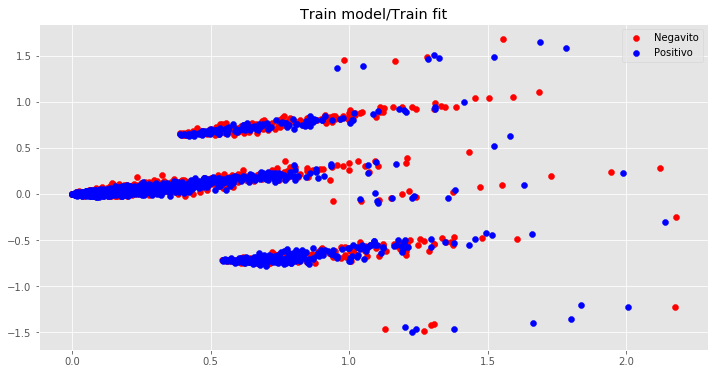

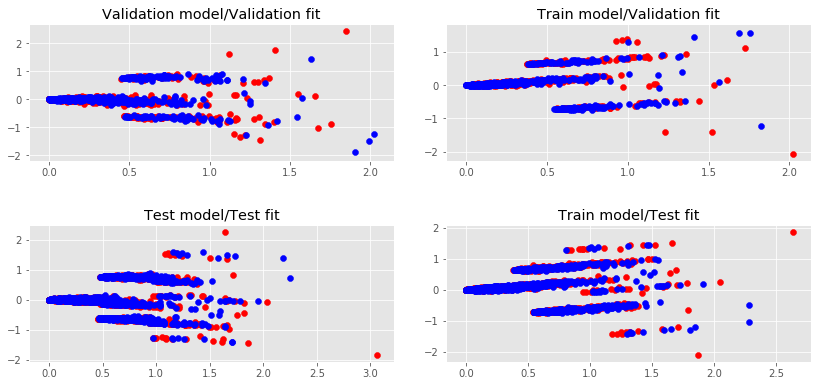

In [17]:
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)

features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()

from sklearn.decomposition import TruncatedSVD
#train
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(12,6))

classes = ['Negavito','Positivo']
unique = np.unique(classes)
colors = {0: 'red', 1: 'blue'}
for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_train[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_train[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title("Train model/Train fit")
plt.show()


#validate
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
model = TruncatedSVD(n_components=2)
model.fit(features_val)
x_plot = model.transform(features_val)

for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Validation model/Validation fit")

plt.subplot(2, 2, 2)
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_val)
for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_val[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Train model/Validation fit")

#test
plt.subplot(2, 2, 3)
model = TruncatedSVD(n_components=2)
model.fit(features_test)
x_plot = model.transform(features_test)

for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Test model/Test fit")

plt.subplot(2, 2, 4)
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_test)

for i, u in enumerate(unique):
    xi = [x_plot[j,0] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    yi = [x_plot[j,1] for j  in range(x_plot.shape[0]) if labels_test[j] == i]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.title("Train model/Test fit")
plt.tight_layout(pad=3.0)


plt.show()


In [18]:
V = len(vocab)
word_scores = np.zeros((V, 2))
#logit 
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 10)

for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

In [19]:

doc = [i[0] for i in word_scores]

dic = sorted(list(zip(vocab, doc)),key=lambda x: x[1])

print("Train Accuracy: ",str(round(train_acc,2)))
print("Test Accuracy: ",str(round(test_acc,2)))
print("Palabras más 'Negativas':")
for i in range(1,16):
    print("\t"+str(i)+". "+str(list(zip(*dic[-16:]))[0][16-i])+", rate : " + str(round(list(zip(*dic[-16:]))[1][16-i],2)))

print("Palabras más 'Positivas':")
for i in range(1,16):
    print("\t"+str(i)+". "+str(list(zip(*dic[:16]))[0][i])+", rate : " + str(round(1-list(zip(*dic[:16]))[1][i],2)))



Train Accuracy:  1.0
Test Accuracy:  0.69
Palabras más 'Negativas':
	1. appar, rate : 0.98
	2. suffer, rate : 0.97
	3. worst, rate : 0.95
	4. tv, rate : 0.95
	5. silli, rate : 0.95
	6. bothersom, rate : 0.95
	7. unfortun, rate : 0.95
	8. bad, rate : 0.94
	9. fire, rate : 0.94
	10. dull, rate : 0.94
	11. plod, rate : 0.94
	12. pie, rate : 0.94
	13. clich, rate : 0.94
	14. devoid, rate : 0.94
	15. depress, rate : 0.93
Palabras más 'Positivas':
	1. world, rate : 0.96
	2. marvel, rate : 0.95
	3. solid, rate : 0.94
	4. evok, rate : 0.94
	5. still, rate : 0.93
	6. witti, rate : 0.93
	7. heart, rate : 0.92
	8. fun, rate : 0.92
	9. consist, rate : 0.92
	10. alway, rate : 0.92
	11. resist, rate : 0.91
	12. histori, rate : 0.91
	13. complex, rate : 0.91
	14. tasti, rate : 0.9
	15. move, rate : 0.9


***Existen ligeros cambios en la representación de los clusters y el listado de palabras positivas y negativas, sin embargo el modelo no muestra mejoras en su métrica de aciertos.***

> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
#train
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
tfidf_model.transform(texts_train)

#val
tfidf_model_val = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model_val.fit(texts_val)
tfidf_model_val.transform(texts_val)

#test
tfidf_model_test = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model_test.fit(texts_test)
tfidf_model_test.transform(texts_test)


<3554x8056 sparse matrix of type '<class 'numpy.float64'>'
	with 39876 stored elements in Compressed Sparse Row format>

In [21]:
V = len(vocab)
word_scores = np.zeros((V, 2))
#logit 
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 10)

for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
doc = [i[0] for i in word_scores]

dic = sorted(list(zip(vocab, doc)),key=lambda x: x[1])

print("Train Accuracy: ",str(round(train_acc,2)))
print("Test Accuracy: ",str(round(test_acc,2)))
print("Palabras más 'Negativas':")
for i in range(1,16):
    print("\t"+str(i)+". "+str(list(zip(*dic[-16:]))[0][16-i])+", rate : " + str(round(list(zip(*dic[-16:]))[1][16-i],2)))

print("Palabras más 'Positivas':")
for i in range(1,16):
    print("\t"+str(i)+". "+str(list(zip(*dic[:16]))[0][i])+", rate : " + str(round(1-list(zip(*dic[:16]))[1][i],2)))



Train Accuracy:  1.0
Test Accuracy:  0.69
Palabras más 'Negativas':
	1. appar, rate : 0.98
	2. suffer, rate : 0.97
	3. worst, rate : 0.95
	4. tv, rate : 0.95
	5. silli, rate : 0.95
	6. bothersom, rate : 0.95
	7. unfortun, rate : 0.95
	8. bad, rate : 0.94
	9. fire, rate : 0.94
	10. dull, rate : 0.94
	11. plod, rate : 0.94
	12. pie, rate : 0.94
	13. clich, rate : 0.94
	14. devoid, rate : 0.94
	15. depress, rate : 0.93
Palabras más 'Positivas':
	1. world, rate : 0.96
	2. marvel, rate : 0.95
	3. solid, rate : 0.94
	4. evok, rate : 0.94
	5. still, rate : 0.93
	6. witti, rate : 0.93
	7. heart, rate : 0.92
	8. fun, rate : 0.92
	9. consist, rate : 0.92
	10. alway, rate : 0.92
	11. resist, rate : 0.91
	12. histori, rate : 0.91
	13. complex, rate : 0.91
	14. tasti, rate : 0.9
	15. move, rate : 0.9


> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [23]:
from sklearn.metrics import classification_report
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 10**-0.5)
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.72      0.73      0.73      1803
           +       0.72      0.71      0.72      1751

    accuracy                           0.72      3554
   macro avg       0.72      0.72      0.72      3554
weighted avg       0.72      0.72      0.72      3554



***Para el caso de la regresión logística no entrega información adicional. Todas las métricas entregan el mismo resultado para ambas clases, debido a que no se esta priorizando una clase sobre la otra.***

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [24]:
classes_weights = {0: 2, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)

score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.65      0.86      0.74      1803
           +       0.79      0.52      0.63      1751

    accuracy                           0.70      3554
   macro avg       0.72      0.69      0.69      3554
weighted avg       0.72      0.70      0.69      3554



In [46]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)

score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.60      0.93      0.73      1803
           +       0.83      0.35      0.49      1751

   micro avg       0.65      0.65      0.65      3554
   macro avg       0.72      0.64      0.61      3554
weighted avg       0.71      0.65      0.61      3554



In [43]:
classes_weights = {0: 10, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)

score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.57      0.96      0.72      1803
           +       0.86      0.27      0.41      1751

   micro avg       0.62      0.62      0.62      3554
   macro avg       0.71      0.61      0.56      3554
weighted avg       0.71      0.62      0.56      3554



In [47]:
classes_weights = {0: 1, 1: 5} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)

score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.84      0.35      0.49      1803
           +       0.58      0.93      0.72      1751

   micro avg       0.64      0.64      0.64      3554
   macro avg       0.71      0.64      0.60      3554
weighted avg       0.71      0.64      0.60      3554



***Efectivamente se puede mejorar la precisión de una clase priorizandola sobre la otra. En promedio se obtienen resultados similares, pero se puede controlar el grado de error de clasificación por clases.***

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [48]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.27186449 0.72813551]
Raw text:  " the road paved with good intentions leads to the video store "

True sent:  0.0 -- Pred sent:  [0.41892721 0.58107279]
Raw text:  very stupid and annoying .

True sent:  0.0 -- Pred sent:  [0.31489261 0.68510739]
Raw text:  without a strong script and energetic acting , dogma films can produce the same sleep-inducing effects as watching your neighbor's home videos .

True sent:  0.0 -- Pred sent:  [0.80351094 0.19648906]
Raw text:  the only thing worse than your substandard , run-of-the-mill hollywood picture is an angst-ridden attempt to be profound .

True sent:  0.0 -- Pred sent:  [0.70949441 0.29050559]
Raw text:  while there's something intrinsically funny about sir anthony hopkins saying 'get in the car , bitch , ' this jerry bruckheimer production has little else to offer

True sent:  1.0 -- Pred sent:  [0.10911478 0.89088522]
Raw text:  it's like an old warner bros . costumer jived with sex -- this could be the

***La predicción continua entrega más información, ya que se puede estimar que tan satisfecho estuvo un usuario con la película, más alla de clasificarlos en solo dos clases. Se le puede atrubuir un factor de credibilidad en la clasificación, en caso de considerar un margen en la regresión para separar en distintas clases. Por otro lado la predicción categórica es más fácil de medir su eficiencia en clasificar y se puede enfocar en predecir una clase sobre la otra.***

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

***Existen instancias ANN donde se ha logrado alcanzar un accuracy incluso superior a la regresión logística, pero al momento de ejecutar de nuevo el código baja un poco su precisión, debido a su naturaleza estocástca. La mejora parece estar tanto en la variación de los modelos y en sus parámetros, como en la modificación de la representación, no parece que existan modelos mejores que otros, si no que cada uno tiene su fuerte.*** 

***k-NN y árbol de decisión son los algoritmos que peor desempeño tienen para este problema, teniendo una precisión del 10% debajo de las mejores expuestas(y 10% sobre un clasificador aleatorio). Esto se atribuye a que no estos modelos intrinsicamente no se adaptan a la problemática del análisis de sentmiento en un texto, es decir son ciegas a muchas caracteristicas que el problema tiene. Tales como peso de las palabras usadas vs el contexto en que se usan.***

***En base a la distribución de la data lo óptimo es utilizar regresión logística dado que su desempeño es mejor, siendo el segundo SVM con un resultado muy similar. ANN en ciertos casos puede superar estos valores, el problema es que el poder de computo que requiere ANN es superior a lo que requiere regresión logística y SVM, es por ello que hay que pensar si la leve mejora vale la pena o incluso puede pasar que nos sea imposible aplicar ciertos algoritmos por limitaciones de tiempo, es por ello que depende mucho del contexto en el que estemos y la tecnología con la que dispongamos.***

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.